In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\subha\OneDrive\Desktop\CarPrice_Data.csv")

In [3]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
data.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [6]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [9]:
data['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [10]:
data['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [11]:
data['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [14]:
data['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

### Preprocessing

In [12]:
df=data.copy()

In [13]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [15]:
df['symboling']=df['symboling'].astype('category')

In [18]:
df.drop(['car_ID'], axis=1, inplace=True)

### EDA

In [28]:
df.groupby('fueltype')['symboling'].count()

fueltype
diesel     20
gas       185
Name: symboling, dtype: int64

In [31]:
df.groupby('fueltype')['price'].sum()

fueltype
diesel     316763.000
gas       2404962.667
Name: price, dtype: float64

In [34]:
df.groupby('symboling')['price'].sum()

symboling
-2     47345.000
-1    381275.000
0     962586.667
1     542047.000
2     323497.000
3     464975.000
Name: price, dtype: float64

<Axes: >

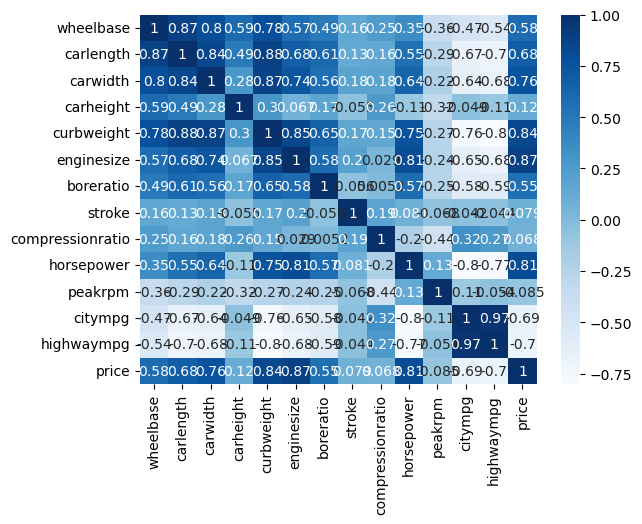

In [35]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [36]:
df.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


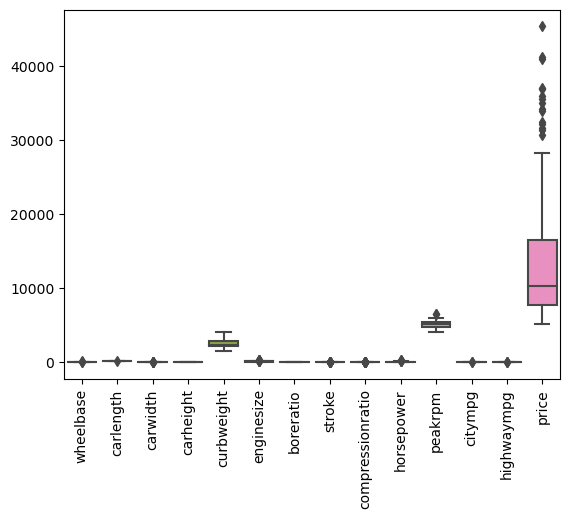

In [39]:
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

In [42]:
dff=df.copy()

In [43]:
dff.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [44]:
dff=dff.drop(['CarName','fueltype','aspiration','carbody','drivewheel','enginelocation','fuelsystem'], axis=1)

In [48]:
dff=dff.drop(['enginetype','cylindernumber'], axis=1)

In [45]:
dff['symboling']=dff['symboling'].astype('int')
dff['doornumber']=dff['doornumber'].map({'two':2, 'four':4})

In [62]:
dff['car volume']=dff['carlength']*dff['carwidth']*dff['carheight']
dff=dff.drop(['carlength','carwidth','carheight'], axis=1)

In [63]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int32  
 1   doornumber        205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   curbweight        205 non-null    int64  
 4   enginesize        205 non-null    int64  
 5   boreratio         205 non-null    float64
 6   stroke            205 non-null    float64
 7   compressionratio  205 non-null    float64
 8   horsepower        205 non-null    int64  
 9   peakrpm           205 non-null    int64  
 10  citympg           205 non-null    int64  
 11  highwaympg        205 non-null    int64  
 12  price             205 non-null    float64
 13  car volume        205 non-null    float64
dtypes: float64(6), int32(1), int64(7)
memory usage: 21.7 KB


In [76]:
dff=dff.drop(['curbweight','wheelbase'], axis=1)

In [82]:
dff=dff.drop(['boreratio'], axis=1)

In [88]:
dff=dff.drop(['highwaympg'], axis=1)

In [96]:
dff=dff.drop(['enginesize'], axis=1)

In [115]:
dff=dff.drop(['car volume'], axis=1)

In [133]:
dff=dff.drop(['doornumber'], axis=1)

In [148]:
dff=dff.drop(['stroke'], axis=1)

<Axes: xlabel='price', ylabel='Density'>

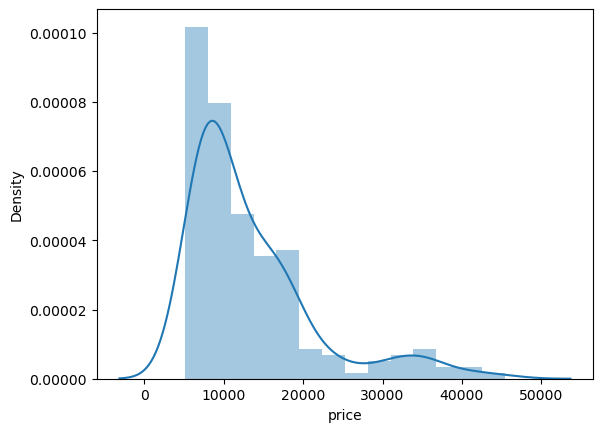

In [194]:
sns.distplot(dff['price'])

In [196]:
q1=dff['price'].quantile(0.25)
q3=dff['price'].quantile(0.75)
iqr=q3-q1
min=q1-1.5*iqr
max=q3+1.5*iqr
dff=dff[(dff['price']>=min) & (dff['price']<=max)]
dff.head()

,symboling,compressionratio,horsepower,peakrpm,citympg,price
0,3,9.0,111,5000,21,13495.0
1,3,9.0,111,5000,21,16500.0
2,1,9.0,154,5000,19,16500.0
3,2,10.0,102,5500,24,13950.0
4,2,8.0,115,5500,18,17450.0


In [197]:
Y=dff['price']
X=dff.drop(['price'], axis=1)

In [198]:
X.shape

(190, 5)

In [199]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['feature']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [200]:
vif

,feature,VIF
0,symboling,1.549458
1,compressionratio,9.367173
2,horsepower,21.592205
3,peakrpm,72.639926
4,citympg,38.001182


<Axes: >

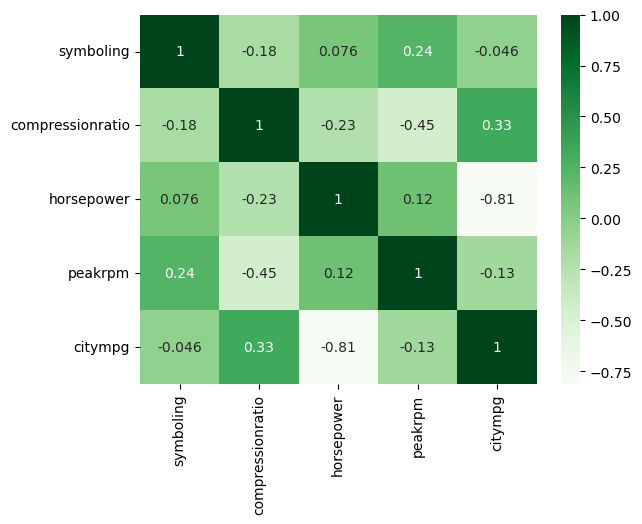

In [201]:
sns.heatmap(X.corr(), annot=True, cmap='Greens')

1.Symboling is negatively correlated to doorno, wheelbase and car volume.
2.Doorno is correlated to wheelbase, carlength and ht.
3.Wheelbase is correlated to many features.


<Axes: >

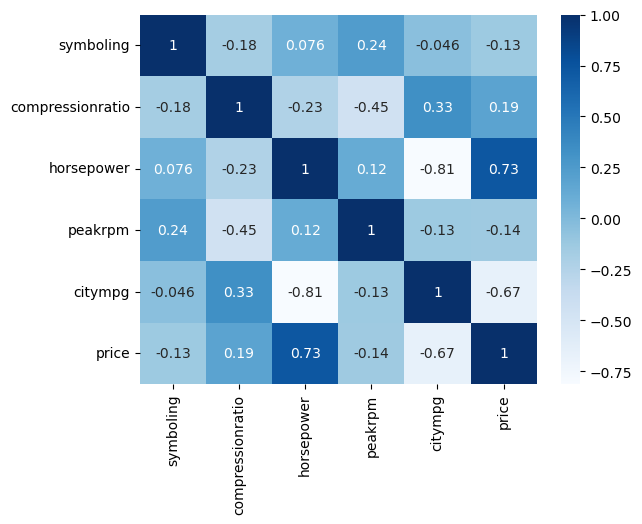

In [202]:
sns.heatmap(dff.corr(), annot=True, cmap='Blues')

In [203]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [204]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.3, random_state=1)

In [216]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [217]:
pred=lr.predict(x_test)

In [219]:
from sklearn.metrics import mean_squared_error, r2_score
print('MSE for LR:', mean_squared_error(pred, y_test))
print('R2 for LR:', r2_score(pred, y_test))

MSE for LR: 6766168.7903602
R2 for LR: 0.6615353543918301


In [218]:
lr.score(x_test, y_test)

0.7349806836587176

In [208]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [209]:
pred=model.predict(x_test)

In [210]:
model.score(x_test, y_test)

0.8234112446275671

In [211]:
print('MSE for DT:', mean_squared_error(pred, y_test))
print('R2 for DT:', r2_score(pred, y_test))

MSE for DT: 4508461.276803119
R2 for DT: 0.8033049229429414


In [212]:
from sklearn.svm import SVR
model=SVR(kernel='poly')
model.fit(x_train, y_train)

SVR(kernel='poly')

In [213]:
pred=model.predict(x_test)

In [214]:
print('MSE for svm:', mean_squared_error(pred, y_test))
print('R2 for svm:', r2_score(pred, y_test))

MSE for svm: 24085018.62248748
R2 for svm: -65.82757366756529


In [215]:
model.score(x_test, y_test)

0.056630810261106945

In [239]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=1000)
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [240]:
pred=model.predict(x_test)

In [241]:
print('MSE for RF:', mean_squared_error(pred, y_test))
print('R2 for RF:', r2_score(pred, y_test))

MSE for RF: 3417212.015517877
R2 for RF: 0.798294258609945


In [242]:
model.score(x_test, y_test)

0.8661536210216902